In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch

from source.wgangp.wgan_model import WGAN_GP

In [3]:
path_to_wgangp_model = "/home/konstantin/personal/OnGansAndGMMs/run/wgangp_gen_40.pt"

In [4]:
z_dim = 100
wgangp_model = WGAN_GP(3, z_dim).cuda()
wgangp_model.G.load_state_dict(torch.load(path_to_wgangp_model))

<All keys matched successfully>

# Sampling from WGAN GP

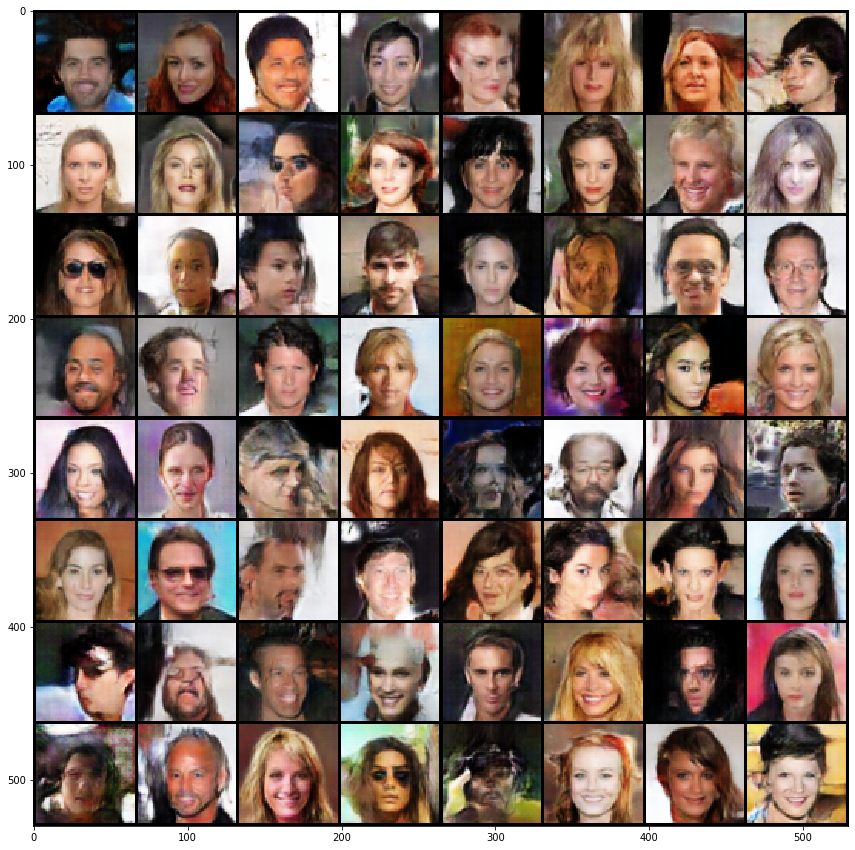

In [5]:
from torch.autograd import Variable
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

grid = make_grid(wgangp_model.G(torch.randn(64, z_dim).cuda()).detach().cpu(), normalize=True)
grid = np.transpose(grid, (1, 2, 0))

plt.figure(figsize=(15, 15))
plt.imshow(grid)
plt.show()

# Bins visualization

In [6]:
from source.ndb.ndb import NDB

from source.mfa.mfa_utils import get_random_samples
from source.ndb.ndb_utils import sample_from_gan

In [7]:
num_train = 80000
num_test = 20000

dataset_root = "/home/konstantin/datasets"

In [8]:
train_samples = get_random_samples(dataset_root, num_train).detach().numpy()

In [9]:
wgangp_samples = sample_from_gan(wgangp_model.G, z_dim, num_test)

In [10]:
ndb = NDB(train_samples, k_clusters=100)

ndb.calculate(wgangp_samples)

(0.46, 100)

## Visualization of over-occupied bin

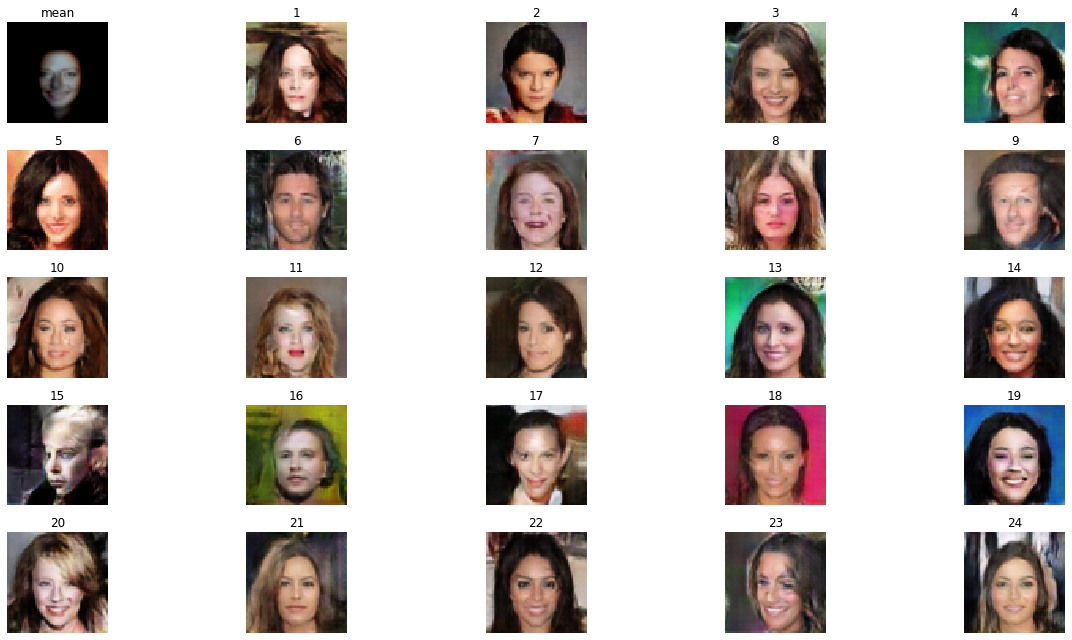

In [22]:
ndb.visualize_min_max_bins(wgangp_samples, id=4, mode='max')

## Visualization of under-occupied bin

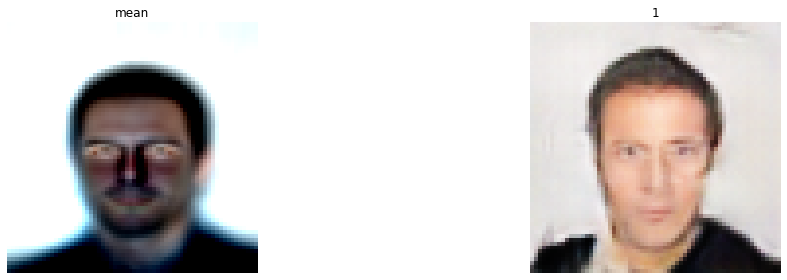

In [23]:
ndb.visualize_min_max_bins(wgangp_samples, id=2,mode='min')